In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
from util.util import binary_symmetric_channel

%matplotlib notebook
%reload_ext autoreload
%autoreload 2

# Entropy and Information Theory

In [2]:
P_X = np.array([.3, .7])

In [4]:
def H(P_X):
    S=np.sum(P_X*np.log2(P_X))
    return -S

In [5]:
H(P_X)

0.8812908992306927

In [7]:
P_B=np.arange(0,1,.01)

In [8]:
H_X=np.zeros(len(P_B))
for i in np.arange(len(P_B)):
    H_X[i]=H([P_B[i],1-P_B[i]])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


<IPython.core.display.Javascript object>


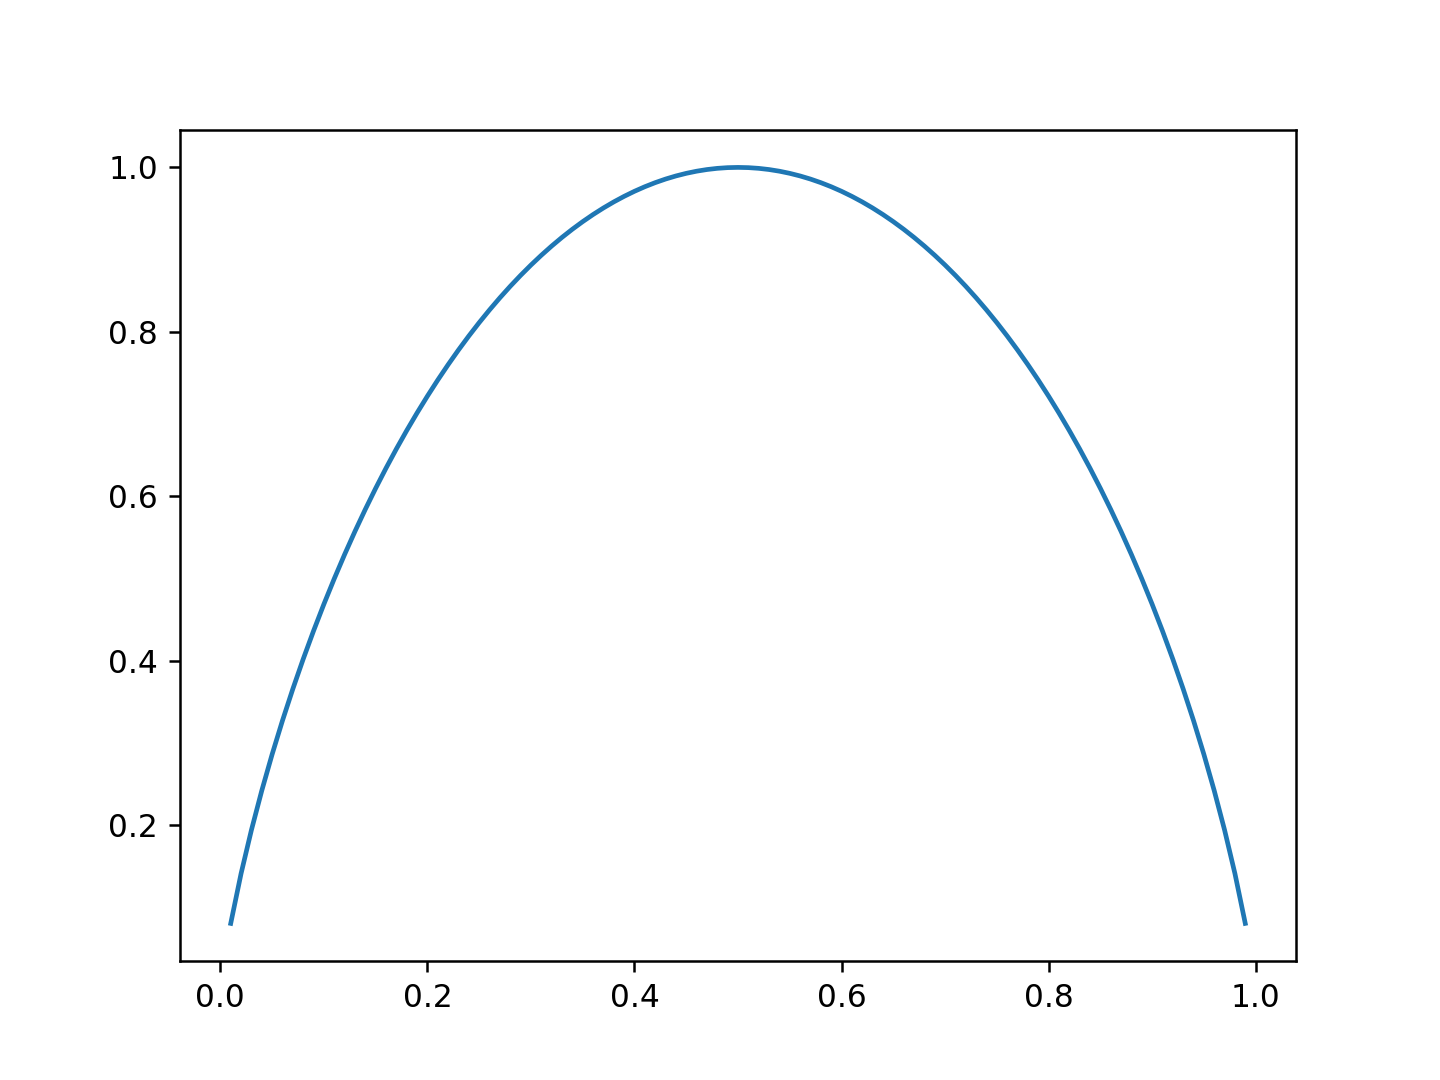

In [9]:
plt.figure()
plt.plot(P_B,H_X)
plt.show()

In [13]:
def I(X,Y):
    p_x_1 = np.mean(X)
    p_x_0 = 1.0 - p_x_1
    
    p_y_1 = np.mean(Y)
    p_y_0 = 1.0 - p_y_1
    
    p_x1_y0 = np.mean(X[Y == 0]) * p_y_0
    p_x0_y0 = 1.0 - p_x1_y0
    
    p_x1_y1 = np.mean(X[Y == 1]) * p_y_1
    p_x0_y1 = 1.0 - p_x1_y1
    
    return p_x0_y0 * (np.log2(p_x0_y0 / (p_x_0*p_y_0)) if p_x0_y0 > 0.0 else 0.0) + \
           p_x0_y1 * (np.log2(p_x0_y1 / (p_x_0*p_y_1)) if p_x0_y1 > 0.0 else 0.0) + \
           p_x1_y0 * (np.log2(p_x1_y0 / (p_x_1*p_y_0)) if p_x1_y0 > 0.0 else 0.0) + \
           p_x1_y1 * (np.log2(p_x1_y1 / (p_x_1*p_y_1)) if p_x1_y1 > 0.0 else 0.0)

In [14]:
# X : the data to be transmitted
X = np.array([0,0,0,0,1,1,1,1,0,1,0,1,0,0,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,1])

# Calculate Y:
Y = binary_symmetric_channel(X, channel=3)

I(X,Y)

2.360941531521813

In [15]:
#the most reliable channel ist given with the max value of the mutual informaton I(X,Y)
I_XY=[]
for i in range(11):
    Y=binary_symmetric_channel(X, channel=i+1);
    I_XY.append(I(X,Y))

print("Best channel: ",I_XY.index(max(I_XY))+1,"with I(X,Y)= ", max(I_XY))

Best channel:  8 with I(X,Y)=  2.6613125849646493


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
